# Data Analyst Project : [E-Commerce Public Dataset]
- **Nama:** [Syahril Arfian Almazril]
- **Email:** [azril4974@gmail.com]
- **ID Dicoding:** [84594325]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana tren penjualan bulanan atau tahunan berdasarkan data order_purchase_timestamp? juga pada bulan dan tahun apa terdapat penjualan tertingginya?

- Pertanyaan 2
Produk apa yang paling sering dibeli oleh konsumen (berdasarkan product_id)? dan bagaimana dengan top 10 produck berdasarkan penjualan terbesar atau terbanyak?

- Pertanyaan 3
Bagaimana distribusi skor ulasan di seluruh dataset? dan apakah customer cenderung merasa puas terhadap product yang disajikan atau cenderung sebaliknya?

- Pertanyaan 4
Di Negara Bagian manakah konsentrasi penjual terbesar itu terjadi? dan Bagaimana kinerja penjualan di negara bagian lain apabila
dibandingkan dengan negara bagian dengan penjualan terbesar itu?

- Pertanyaan 5
Apa jenis metode pembayaran yang paling umum digunakan oleh konsumen? dan
Apakah terdapat perbedaan nilai transaksi rata-rata antara metode pembayaran yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [191]:
# @title Customers_dataset

customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [192]:
# @title Geolocation_dataset

geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [193]:
# @title Order_Items_dataset

order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [194]:
# @title Order_Payments_dataset

order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [195]:
# @title Order_Reviews_dataset

order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [196]:
# @title Orders_dataset

orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [197]:
# @title Product_Category_Name_Translation_dataset

product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [198]:
# @title Products_dataset

products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [199]:
# @title Sellers_dataset

sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [200]:
# @title Customers_dataset

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [201]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [202]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [203]:
# @title Geolocation_dataset

geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [204]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [205]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [206]:
# @title Order_Items_dataset

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [207]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [208]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [209]:
# @title Order_Payments_dataset

order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [210]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [211]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [212]:
# @title Order_Reviews_dataset

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [213]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [214]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [215]:
# @title Orders_dataset

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [216]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [217]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [218]:
# @title Product_Category_Name_Translation_dataset

product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [219]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [220]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [221]:
# @title Products_dataset

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [222]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [223]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [224]:
# @title Sellers_dataset

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [225]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [226]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [227]:
# @title Costumers_dataset
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [228]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [229]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [230]:
# @title Geolocation_dataset

print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [231]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [232]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [233]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [234]:
# @title Order_Items_dataset

print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [235]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [236]:
# datetime

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [237]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [238]:
# @title Order_Payments_dataset

print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [239]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [240]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [241]:
# @title Order_Reviews_dataset

print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [242]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [243]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].astype('category')

order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  category      
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(1), object(3)
memory usage: 4.9+ MB


In [244]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [245]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [246]:
order_reviews_df.dropna(inplace=True)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02


In [247]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [248]:
order_reviews_df.review_score.value_counts()

,count
review_score,
5,5422
1,1789
4,1433
3,737
2,458


In [249]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,354
recomendo,270
Bom,228
super recomendo,213
Excelente,203
...,...
Compra bem sucedida!,0
Compra Berço,0
Muito bom!!!!!,0


In [250]:
# @title Orders_dataset

print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [251]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [252]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df['order_status'] = orders_df['order_status'].astype('category')

orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [253]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [254]:
orders_df.dropna(inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [255]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [256]:
# @title Product_Category_Name_Translation_dataset

print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()


Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [257]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [258]:
product_category_name_translation_df['product_category_name'] = product_category_name_translation_df['product_category_name'].astype('category')
product_category_name_translation_df['product_category_name_english'] = product_category_name_translation_df['product_category_name_english'].astype('category')

product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   product_category_name          71 non-null     category
 1   product_category_name_english  71 non-null     category
dtypes: category(2)
memory usage: 5.5 KB


In [259]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [260]:
# @title Products_dataset

print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [261]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [262]:
products_df['product_category_name'] = products_df['product_category_name'].astype('category')
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   product_id                  32951 non-null  object  
 1   product_category_name       32341 non-null  category
 2   product_name_lenght         32341 non-null  float64 
 3   product_description_lenght  32341 non-null  float64 
 4   product_photos_qty          32341 non-null  float64 
 5   product_weight_g            32949 non-null  float64 
 6   product_length_cm           32949 non-null  float64 
 7   product_height_cm           32949 non-null  float64 
 8   product_width_cm            32949 non-null  float64 
dtypes: category(1), float64(7), object(1)
memory usage: 2.0+ MB


In [263]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [264]:
products_df.dropna(inplace=True)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [265]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [266]:
# @title Sellers_dataset

print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [267]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [268]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


## Exploratory Data Analysis (EDA)

In [269]:
# @title Customers_dataset
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
24272,248dd234449ae68be3b93a1eba9ff33f,916792a184efb5fb9fb04406a4e174b3,6786,taboao da serra,SP
35285,4290bd84a6ae4fd0c1ade7aeb39d81cc,93502f7e89451b4523954edf5382c032,82840,curitiba,PR
83160,6fd5c621e78c434aa741e9ffb9c68250,ed8447bf08c6b1fb83408eb0eec608a4,30411,belo horizonte,MG
81833,d99ac336d73ac792b2501d0c9bb4db20,490181818ec661c6afd91ca1ff0ee049,89046,blumenau,SC
60345,5c40be15b2c8fc641d9a1fc0493ac2bf,7daa5521f49c5a710da721d485f023d1,52051,recife,PE


In [270]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [271]:
customers_df.customer_id.is_unique

True

In [272]:
grouped_df = customers_df.groupby('customer_state').agg({
    'customer_id': 'nunique',
    'customer_zip_code_prefix': ['max', 'min', 'mean', 'std']
})

grouped_df.head()

customer_id customer_zip_code_prefix                       \
                   nunique                      max    min          mean   
customer_state                                                             
AC                      81                    69980  69900  69914.604938   
AL                     413                    57975  57010  57215.881356   
AM                     148                    69800  69005  69078.445946   
AP                      68                    68997  68900  68910.044118   
BA                    3380                    48990  40010  44102.125444   

                             
                        std  
customer_state               
AC                16.271662  
AL               264.487732  
AM               128.339859  
AP                16.388414  
BA              2742.967242

In [273]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [274]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [275]:
# @title Geolocation_dataset
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
298122,13220,-23.213028,-46.841591,varzea paulista,SP
16392,1526,-23.563268,-46.630600,são paulo,SP
98515,4634,-23.638692,-46.666394,sao paulo,SP
947831,91340,-30.017603,-51.171705,porto alegre,RS
409673,20260,-22.919038,-43.213619,rio de janeiro,RJ


In [276]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [277]:
geolocation_df.geolocation_zip_code_prefix.is_unique

False

In [278]:
grouped_df = geolocation_df.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix': ['max', 'min', 'mean', 'std'],
    'geolocation_lat': ['mean', 'std'],
    'geolocation_lng': ['mean', 'std'],
    'geolocation_city': 'nunique'
})

grouped_df.head()


geolocation_zip_code_prefix                       \
                                          max    min          mean   
geolocation_state                                                    
AC                                      69990   4011  69768.340712   
AL                                      57995  57000  57245.898682   
AM                                      69895  69005  69146.506042   
AP                                      68997  68900  68912.047425   
BA                                      48990  40010  44481.740007   

                               geolocation_lat           geolocation_lng  \
                           std            mean       std            mean   
geolocation_state                                                          
AC                 2921.029978       -9.709319  1.167721      -68.453261   
AL                  282.920807       -9.592373  1.051149      -36.067588   
AM                  210.293735       -3.346562  1.073800      -60.535697   
AP                   19.138903        0.073767  1.573824      -51.204454   
BA                 2680.540368      -13.062407  1.721587      -39.627164   

                            geolocation_city  
                        std          nunique  
geolocation_state                             
AC                 2.126546               34  
AL                 1.028490              130  
AM                 2.161256               74  
AP                 0.366935               17  
BA                 1.713727              652

In [279]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_state,
SP,6349
MG,1868
RJ,1390
RS,1132
PR,1046
BA,992
GO,773
SC,620
PE,596


In [280]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_city,
sao paulo,3171
são paulo,3013
brasilia,496
brasília,406
rio de janeiro,404
...,...
guarei,1
guardinha,1
guarda-mor,1


In [281]:
# @title Order_Items

order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
85404,c1ff65479834ffeb424c5a78cd65ce4c,2,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2018-05-07 05:30:51,53.90,16.07
38277,56e74cf3d3be617b843ad339dd83706a,1,35ebf08a93899d44e756809e11b14754,128639473a139ac0f3e5f5ade55873a5,2018-05-09 21:30:41,15.12,9.43
77304,aff8085aa67afd7180c91552d939a4dd,2,29e4631be78811ab993ae12613053b53,8581055ce74af1daba164fdbd55a40de,2017-06-05 04:30:30,138.00,18.48
32700,4a1c3af89657b2177e85765d4390ef46,1,45faac1ea8c173bb8c3e6cf23f5aac4e,6d803cb79cc31c41c4c789a75933b3c7,2018-04-08 21:10:29,59.90,14.51
97040,dc29ff8af44169bdd140d5e40575da43,2,e00bca3fc8267dabace41fc4bc7366d7,0885aaf116795758dfeb5f1032487bcd,2018-05-28 18:31:54,88.90,10.06


In [282]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [283]:
order_items_df.order_id.is_unique

False

In [284]:
grouped_df = order_items_df.groupby('order_id').agg({
    'order_item_id': 'nunique',
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'price': ['mean', 'std'],
    'freight_value': ['mean', 'std']
})

grouped_df.head()

order_item_id product_id seller_id   price  \
                                       nunique    nunique   nunique    mean   
order_id                                                                      
00010242fe8c5a6d1ba2dd792cb16214             1          1         1   58.90   
00018f77f2f0320c557190d7a144bdd3             1          1         1  239.90   
000229ec398224ef6ca0657da4fc703e             1          1         1  199.00   
00024acbcdf0a6daa1e931b038114c75             1          1         1   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9             1          1         1  199.90   

                                     freight_value      
                                 std          mean std  
order_id                                                
00010242fe8c5a6d1ba2dd792cb16214 NaN         13.29 NaN  
00018f77f2f0320c557190d7a144bdd3 NaN         19.93 NaN  
000229ec398224ef6ca0657da4fc703e NaN         17.87 NaN  
00024acbcdf0a6daa1e931b038114c75 NaN         12.79 NaN  
00042b26cf59d7ce69dfabb4e55b4fd9 NaN         18.14 NaN

In [285]:
order_items_df.groupby(by="freight_value").order_id.nunique().sort_values(ascending=False)

,order_id
freight_value,
15.10,3269
7.78,2016
14.10,1669
11.85,1609
18.23,1359
...,...
7.38,1
62.88,1
7.36,1


In [286]:
order_items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False)

,order_id
price,
59.90,2087
69.90,1821
49.90,1675
89.90,1419
99.90,1319
...,...
189.42,1
46.63,1
189.49,1


In [287]:
# @title Order_Payments

order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
79741,a601a8f0f146d6c5689c436aaabfdbb4,1,credit_card,6,217.00
50870,b61ef53b312800422111b08cd1619498,1,credit_card,3,32.78
55229,d4c6540209a24e7769655f55d8a20493,1,credit_card,6,133.36
80304,e56df93227f8b483792fc4571550b4a8,1,credit_card,2,167.85
76812,f211430c0952db7a012de2ee8cdcffa9,1,credit_card,1,63.88


In [288]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [289]:
order_payments_df.order_id.is_unique

False

In [290]:
grouped_df = order_payments_df.groupby('order_id').agg({
    'payment_sequential': 'nunique',
    'payment_type': 'nunique',
    'payment_installments': ['mean', 'std'],
    'payment_value': ['mean', 'std']
})

grouped_df.head()

payment_sequential payment_type  \
                                            nunique      nunique   
order_id                                                           
00010242fe8c5a6d1ba2dd792cb16214                  1            1   
00018f77f2f0320c557190d7a144bdd3                  1            1   
000229ec398224ef6ca0657da4fc703e                  1            1   
00024acbcdf0a6daa1e931b038114c75                  1            1   
00042b26cf59d7ce69dfabb4e55b4fd9                  1            1   

                                 payment_installments     payment_value      
                                                 mean std          mean std  
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214                  2.0 NaN         72.19 NaN  
00018f77f2f0320c557190d7a144bdd3                  3.0 NaN        259.83 NaN  
000229ec398224ef6ca0657da4fc703e                  5.0 NaN        216.87 NaN  
00024acbcdf0a6daa1e931b038114c75                  2.0 NaN         25.78 NaN  
00042b26cf59d7ce69dfabb4e55b4fd9                  3.0 NaN        218.04 NaN

In [291]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [292]:
order_payments_df.groupby(by="payment_sequential").order_id.nunique().sort_values(ascending=False)

,order_id
payment_sequential,
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82
8,54
9,43


<Axes: >

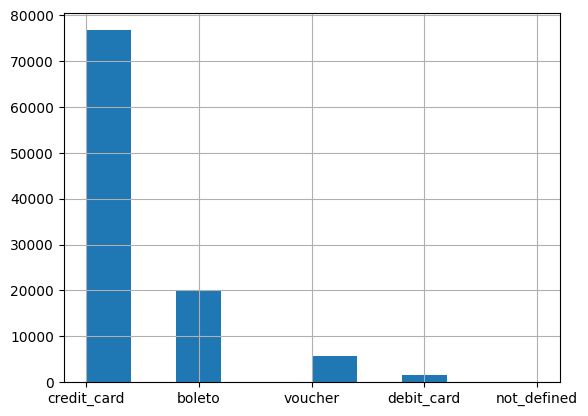

In [293]:
order_payments_df.payment_type.hist()

In [294]:
# @title Order_Reviews

order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
73405,ae9a6292e8d0c28dd78e1186df0c9f6b,b69b78a1865e7b379d633794c80ef7d2,5,Super recomendado,Site confiável. O produto foi entregue antes d...,2018-05-15,2018-05-15 22:33:37
32373,7f298aba2b59e6f9561e430d75728eb9,16a182d2e328e5f0b3252d367e17bc14,5,Satisfeito,Exatamente como no anúncio .\r\nEntrega rápida...,2018-05-01,2018-05-03 09:32:03
81415,42df4a9a31b08aa5d16c6898504da82d,9f7474d5eab299f291d474286d5272ca,4,Muito bom.....,O produto pelo valor ok apesar de já no primei...,2018-04-28,2018-04-29 16:36:28
95013,4f29f8cf81c5c0339f009e16f2ddc17d,82f4c933483d577ca9f00f49b1203155,1,produto não entregue,"meu produto não foi entregue, querem que eu re...",2018-08-03,2018-08-03 16:18:56
39612,707caf340cbb2ec32aec3b5732391e6f,73df7f271536068cac9f113c9d73cbb0,5,Recomendo,Recomendo sempre.,2018-08-24,2018-08-28 03:05:48


In [295]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,9839,9839,9839.000000,9839,9839,9839,9839
unique,9798,9830,NaN,4123,9024,NaN,NaN
top,08528f70f579f0c830189efc523d2182,2daee070f2042c8b7a8e9fdde778a31a,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,2,NaN,354,63,NaN,NaN
mean,NaN,NaN,3.837585,NaN,NaN,2018-06-27 19:27:46.632787712,2018-07-01 09:24:11.992275456
min,NaN,NaN,1.000000,NaN,NaN,2017-05-16 00:00:00,2018-04-26 12:56:00
25%,NaN,NaN,3.000000,NaN,NaN,2018-05-22 00:00:00,2018-05-24 16:02:53
50%,NaN,NaN,5.000000,NaN,NaN,2018-06-27 00:00:00,2018-06-30 14:54:10
75%,NaN,NaN,5.000000,NaN,NaN,2018-08-04 00:00:00,2018-08-06 21:33:29
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-24 21:34:38


In [296]:
order_reviews_df.order_id.is_unique

False

In [297]:
grouped_df = order_reviews_df.groupby('order_id').agg({
    'review_id': 'nunique',
    'review_score': ['mean', 'std'],
    'review_comment_title': 'nunique',
    'review_comment_message': 'nunique'
})

grouped_df.head()

review_id review_score      \
                                   nunique         mean std   
order_id                                                      
0006ec9db01a64e59a68b2c340bf65a7         1          5.0 NaN   
000aed2e25dbad2f9ddb70584c5a2ded         1          1.0 NaN   
00130c0eee84a3d909e75bc08c5c3ca1         1          5.0 NaN   
001e7cf2ad6bef3ade12ebc56ceaf0f3         1          1.0 NaN   
002175704e8b209f61b9ad5cfd92b60e         1          4.0 NaN   

                                 review_comment_title review_comment_message  
                                              nunique                nunique  
order_id                                                                      
0006ec9db01a64e59a68b2c340bf65a7                    1                      1  
000aed2e25dbad2f9ddb70584c5a2ded                    1                      1  
00130c0eee84a3d909e75bc08c5c3ca1                    1                      1  
001e7cf2ad6bef3ade12ebc56ceaf0f3                    1                      1  
002175704e8b209f61b9ad5cfd92b60e                    1                      1

In [298]:
order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

,order_id
review_score,
5,5416
1,1789
4,1433
3,737
2,458


In [299]:
order_reviews_df.groupby(by="review_comment_title").order_id.nunique().sort_values(ascending=False)

<ipython-input-299-9a5619cb472e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_reviews_df.groupby(by="review_comment_title").order_id.nunique().sort_values(ascending=False)


,order_id
review_comment_title,
Recomendo,354
recomendo,270
Bom,228
super recomendo,211
Excelente,203
...,...
Compra bem sucedida!,0
Compra Berço,0
Muito bom!!!!!,0


array([[<Axes: title={'center': 'review_score'}>]], dtype=object)

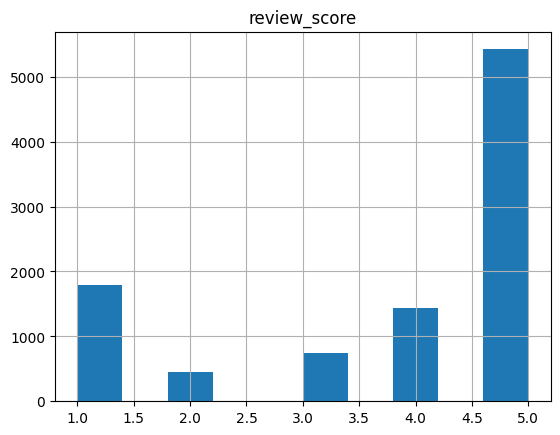

In [300]:
order_reviews_df.hist(column="review_score")

In [301]:
# @title Orders_dataset

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
81575,b4569b2bb5498e383b5e2bc4065a2a41,3392d132ef52f5cc50e857021fc0eda0,delivered,2017-07-12 07:30:05,2017-07-13 10:33:49,2017-07-13 19:56:48,2017-07-17 18:41:30,2017-08-15
47853,5411157481132a0783dbf080096a4c96,965d1f24bce3dd938f7e63fbf7e0a0b6,delivered,2017-11-26 23:20:43,2017-11-28 03:20:16,2017-12-15 18:26:46,2017-12-27 19:16:56,2017-12-19
69369,52a2359e51fb8624aed7515a20a1494a,7575557a12a4a1f9090984b67468bcf1,delivered,2018-07-16 16:24:16,2018-07-16 16:55:21,2018-07-24 13:21:00,2018-07-30 23:42:31,2018-08-13
88925,fe9d34568d9ac7651ff018def29da70f,419de035a0a31527733258cce22a7bff,delivered,2018-05-10 03:38:27,2018-05-11 02:57:34,2018-05-12 08:18:00,2018-06-04 23:21:55,2018-06-08
6118,50ba48feadedab8aed970b1ed1d6e058,fbb95d9cb6b53d485fbc9872bb051068,delivered,2018-04-10 17:22:26,2018-04-10 17:32:18,2018-04-11 22:42:09,2018-04-17 20:33:50,2018-05-11


In [302]:
import pandas as pd

orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])


delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
delivery_time = delivery_time.dt.total_seconds()

orders_df['delivery_time'] = round(delivery_time / 86400)

orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
65171,d16d1d91feaf7e5d293ea1ebb0a60b7f,a6fbea1bf9c455de2ba3f34d3564f5a7,delivered,2018-01-03 19:05:58,2018-01-05 17:08:34,2018-01-08 20:38:12,2018-01-09 15:30:19,2018-01-19,-9.0
5910,4f5045d7a7d322ba928da791f6d5c9f4,af51c0b5fcb9ff4bdc3e48e8d73446d4,delivered,2017-07-05 20:55:17,2017-07-05 21:05:13,2017-07-07 13:31:55,2017-07-11 17:12:39,2017-07-25,-13.0
40263,767f188a65e841e610f8a69e129fbdea,32e4cf48b6e69f385da77b75acdf4c6b,delivered,2017-05-09 21:43:41,2017-05-09 21:55:21,2017-05-16 11:36:26,2017-05-25 12:13:05,2017-05-29,-3.0
21183,b11ef0887d152f735e9b39864eae2ad3,4529772b580b0249d5cdd57099d9d000,delivered,2017-05-14 01:08:21,2017-05-14 01:22:45,2017-05-16 10:58:06,2017-05-23 12:32:50,2017-06-13,-20.0
21060,56f7baee2d1568fbd2dac0ba1a77418e,119c2bef5f2a91310495d3c149912884,delivered,2018-03-17 16:37:16,2018-03-17 16:50:45,2018-03-20 00:42:33,2018-04-20 15:21:16,2018-04-12,9.0


In [303]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,-11.007309
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-146.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,-16.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,-12.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,-6.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,189.000000


<Axes: >

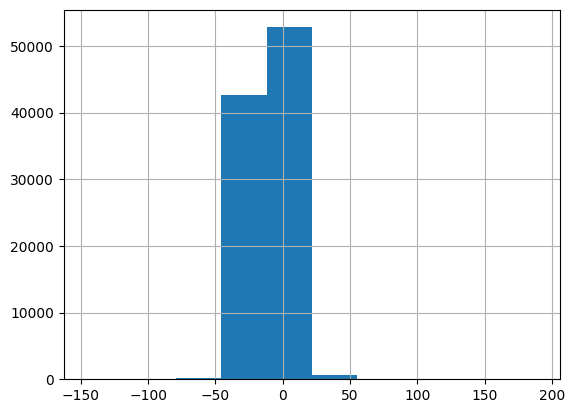

In [304]:
orders_df.delivery_time.hist()

In [305]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
64245,aced6d359dd4b94375971b67f59c4f9a,679035e8cc2a531fbf539676b782d825,13271,valinhos,SP,Non Active
29220,28791c94579a4d9701f4c05e6c5f87de,9622a5e690173e69309e964cdec06605,51350,recife,PE,Non Active
89310,ae4c4beb11e7a4b395a9acc4ea3ee895,068cee6bf82a34aab08b5f08b9af4f51,28055,campos dos goytacazes,RJ,Non Active
44041,59cc843769a7a0247161ebb5979f0e69,4515150852347d1fc0deeb2d86c18500,3589,sao paulo,SP,Non Active
4907,e71bc052424770177302796c5867257a,959516ad250b4c7978d15055cb9789e3,68904,macapa,AP,Non Active


In [306]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Non Active,99441


In [307]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Non Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Non Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Non Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Non Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Non Active
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Non Active
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Non Active
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Non Active
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Non Active


In [308]:
orders_df.order_id.is_unique

True

In [309]:
grouped_df = orders_df.groupby('order_id').agg({
    'customer_id': 'nunique',
    'order_status': 'nunique',
    'order_purchase_timestamp': 'nunique',
    'order_approved_at': 'nunique',
    'order_delivered_carrier_date': 'nunique',
    'order_delivered_customer_date': 'nunique',
    'order_estimated_delivery_date': 'nunique'

})

grouped_df.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1,1


In [310]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

<ipython-input-310-cba2931d1a96>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)


,order_id
order_status,
delivered,96455
canceled,6
approved,0
created,0
invoiced,0
processing,0
shipped,0
unavailable,0


In [311]:
orders_df.groupby(by="order_purchase_timestamp").order_id.nunique().sort_values(ascending=False)

,order_id
order_purchase_timestamp,
2018-08-02 12:06:09,3
2017-11-20 10:59:08,3
2017-11-20 11:46:30,3
2018-07-28 13:11:22,3
2018-06-01 13:39:44,3
...,...
2017-11-10 01:04:50,1
2017-11-10 00:50:51,1
2017-11-09 23:55:05,1


In [312]:
# @title Product_Category_Name_Translation_dataset

product_category_name_translation_df.sample(5)

,product_category_name,product_category_name_english
7,utilidades_domesticas,housewares
45,alimentos,food
58,bebidas,drinks
20,audio,audio
17,fashion_bolsas_e_acessorios,fashion_bags_accessories


In [313]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,agro_industria_e_comercio,agro_industry_and_commerce
freq,1,1


In [314]:
product_category_name_translation_df.product_category_name.is_unique

True

In [315]:
grouped_df = product_category_name_translation_df.groupby('product_category_name').agg({
    'product_category_name_english': 'nunique'
})

grouped_df.head()

<ipython-input-315-b208337c0bb5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = product_category_name_translation_df.groupby('product_category_name').agg({


,product_category_name_english
product_category_name,
agro_industria_e_comercio,1
alimentos,1
alimentos_bebidas,1
artes,1
artes_e_artesanato,1


In [316]:
product_category_name_translation_df.groupby(by="product_category_name_english").product_category_name.nunique().sort_values(ascending=False)

<ipython-input-316-d15bf6e765d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_name_translation_df.groupby(by="product_category_name_english").product_category_name.nunique().sort_values(ascending=False)


,product_category_name
product_category_name_english,
agro_industry_and_commerce,1
home_appliances_2,1
kitchen_dining_laundry_garden_furniture,1
industry_commerce_and_business,1
housewares,1
...,...
diapers_and_hygiene,1
costruction_tools_tools,1
costruction_tools_garden,1


In [317]:
product_category_name_translation_df.groupby(by="product_category_name").product_category_name_english.nunique().sort_values(ascending=False)

<ipython-input-317-6322c813407b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_name_translation_df.groupby(by="product_category_name").product_category_name_english.nunique().sort_values(ascending=False)


,product_category_name_english
product_category_name,
agro_industria_e_comercio,1
instrumentos_musicais,1
market_place,1
malas_acessorios,1
livros_tecnicos,1
...,...
construcao_ferramentas_iluminacao,1
construcao_ferramentas_ferramentas,1
construcao_ferramentas_construcao,1


In [318]:
# @title Products_dataset

products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17482,1ec3e93251df2e23babb7daa30c52496,esporte_lazer,34.0,231.0,2.0,100.0,16.0,16.0,11.0
14204,c65f71634a9d0de5b4a1d7dbb6d3ae01,utilidades_domesticas,42.0,588.0,3.0,500.0,35.0,15.0,20.0
7373,198ea0e78807db11ea9ed486b8a0e320,brinquedos,18.0,366.0,1.0,600.0,30.0,16.0,20.0
31489,54a96160126877c6a5cd30bfd35831e3,beleza_saude,54.0,1510.0,1.0,1550.0,20.0,30.0,25.0
15533,12f996b4a20f364ff8b53e086e0bff8c,eletronicos,49.0,1130.0,1.0,148.0,17.0,15.0,15.0


In [319]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [320]:
products_df.product_id.is_unique

True

In [321]:
grouped_df = products_df.groupby('product_id').agg({
    'product_category_name': 'nunique',
    'product_name_lenght': ['mean', 'std'],
    'product_description_lenght': ['mean', 'std'],
    'product_photos_qty': ['mean', 'std'],
    'product_weight_g': ['mean', 'std'],
    'product_length_cm': ['mean', 'std'],
    'product_height_cm': ['mean', 'std'],
    'product_width_cm': ['mean', 'std']
})

grouped_df.head()

product_category_name product_name_lenght  \
                                               nunique                mean   
product_id                                                                   
00066f42aeeb9f3007548bb9d3f33c38                     1                53.0   
00088930e925c41fd95ebfe695fd2655                     1                56.0   
0009406fd7479715e4bef61dd91f2462                     1                50.0   
000b8f95fcb9e0096488278317764d19                     1                25.0   
000d9be29b5207b54e86aa1b1ac54872                     1                48.0   

                                     product_description_lenght      \
                                 std                       mean std   
product_id                                                            
00066f42aeeb9f3007548bb9d3f33c38 NaN                      596.0 NaN   
00088930e925c41fd95ebfe695fd2655 NaN                      752.0 NaN   
0009406fd7479715e4bef61dd91f2462 NaN                      266.0 NaN   
000b8f95fcb9e0096488278317764d19 NaN                      364.0 NaN   
000d9be29b5207b54e86aa1b1ac54872 NaN                      613.0 NaN   

                                 product_photos_qty     product_weight_g      \
                                               mean std             mean std   
product_id                                                                     
00066f42aeeb9f3007548bb9d3f33c38                6.0 NaN            300.0 NaN   
00088930e925c41fd95ebfe695fd2655                4.0 NaN           1225.0 NaN   
0009406fd7479715e4bef61dd91f2462                2.0 NaN            300.0 NaN   
000b8f95fcb9e0096488278317764d19                3.0 NaN            550.0 NaN   
000d9be29b5207b54e86aa1b1ac54872                4.0 NaN            250.0 NaN   

                                 product_length_cm     product_height_cm      \
                                              mean std              mean std   
product_id                                                                     
00066f42aeeb9f3007548bb9d3f33c38              20.0 NaN              16.0 NaN   
00088930e925c41fd95ebfe695fd2655              55.0 NaN              10.0 NaN   
0009406fd7479715e4bef61dd91f2462              45.0 NaN              15.0 NaN   
000b8f95fcb9e0096488278317764d19              19.0 NaN              24.0 NaN   
000d9be29b5207b54e86aa1b1ac54872              22.0 NaN              11.0 NaN   

                                 product_width_cm      
                                             mean std  
product_id                                             
00066f42aeeb9f3007548bb9d3f33c38             16.0 NaN  
00088930e925c41fd95ebfe695fd2655             26.0 NaN  
0009406fd7479715e4bef61dd91f2462             35.0 NaN  
000b8f95fcb9e0096488278317764d19             12.0 NaN  
000d9be29b5207b54e86aa1b1ac54872             15.0 NaN

In [322]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

<ipython-input-322-09e8007376c7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)


,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


In [323]:
products_df.groupby(by="product_name_lenght").product_id.nunique().sort_values(ascending=False)

,product_id
product_name_lenght,
60.0,2181
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
67.0,1
68.0,1
69.0,1


In [324]:
# @title Sellers_dataset

sellers_df.sample(5)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
3053,f9244d45189d3a3605499abddeade7d5,3029,sao paulo,SP
666,6b15924333bd1a741595fe981ea04822,9541,sao caetano do sul,SP
787,c54679b132454625907c773d273d4126,11443,guaruja,SP
3032,586a871d4f1221763fddb6ceefdeb95e,90630,porto alegre,RS
2375,bb3dca718920a4d7ec3cc9ffb025108b,8011,sao paulo,SP


In [325]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [326]:
sellers_df.seller_id.is_unique

True

In [327]:
grouped_df = sellers_df.groupby('seller_id').agg({
    'seller_zip_code_prefix': ['max', 'min', 'mean', 'std'],
    'seller_city': 'nunique',
    'seller_state': 'nunique'
})

grouped_df.head()

seller_zip_code_prefix                      \
                                                    max    min     mean std   
seller_id                                                                     
0015a82c2db000af6aaaf3ae2ecb0532                   9080   9080   9080.0 NaN   
001cca7ae9ae17fb1caed9dfb1094831                  29156  29156  29156.0 NaN   
001e6ad469a905060d959994f1b41e4f                  24754  24754  24754.0 NaN   
002100f778ceb8431b7a1020ff7ab48f                  14405  14405  14405.0 NaN   
003554e2dce176b5555353e4f3555ac8                  74565  74565  74565.0 NaN   

                                 seller_city seller_state  
                                     nunique      nunique  
seller_id                                                  
0015a82c2db000af6aaaf3ae2ecb0532           1            1  
001cca7ae9ae17fb1caed9dfb1094831           1            1  
001e6ad469a905060d959994f1b41e4f           1            1  
002100f778ceb8431b7a1020ff7ab48f           1            1  
003554e2dce176b5555353e4f3555ac8           1            1

In [328]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [329]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


### Explore ...

In [330]:
customers_df = pd.read_csv('customers_dataset.csv')
geolocation_df = pd.read_csv('geolocation_dataset.csv')

customers_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

customers_geolocation_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


In [331]:
customers_geolocation_df.groupby(by="geolocation_state").customer_id.nunique().sort_values(ascending=False).head(10)

,customer_id
geolocation_state,
SP,41731
RJ,12839
MG,11624
RS,5473
PR,5034
SC,3651
BA,3371
ES,2027
GO,2011


In [332]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_payments_df = pd.read_csv('order_payments_dataset.csv')

order_item_order_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

order_item_order_payments_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [333]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')

order_reviews_orders_df = pd.merge(
    left=order_reviews_df,
    right=orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
order_reviews_orders_df = order_reviews_orders_df.dropna()
order_reviews_orders_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,a5224bdc7685fd39cd7a23404415493d,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06 00:00:00
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,659ded3e9b43aaf51cf9586d03033b46,delivered,2018-05-18 18:20:45,2018-05-18 18:35:28,2018-05-19 09:27:00,2018-05-22 14:58:47,2018-06-07 00:00:00
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,e494ff798e6549f9ba9747f00f5681c2,delivered,2018-07-04 20:34:57,2018-07-05 16:33:00,2018-07-05 15:55:00,2018-07-09 20:27:50,2018-07-23 00:00:00
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,3fecd6727aed19735e06945b7c3e49c9,delivered,2018-05-18 12:15:11,2018-05-18 13:05:53,2018-05-21 16:13:00,2018-06-06 18:22:40,2018-06-14 00:00:00
36,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5,Bom,"Recomendo ,",2018-06-13 00:00:00,2018-06-13 22:54:44,d2aa6bef2582c7482ab992fa89f965bd,delivered,2018-06-01 14:12:09,2018-06-01 14:32:30,2018-06-05 14:48:00,2018-06-12 19:41:53,2018-06-29 00:00:00


In [334]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
products_df = pd.read_csv('products_dataset.csv')

product_category_name_translation_products_df = pd.merge(
    left=product_category_name_translation_df,
    right=products_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

product_category_name_translation_products_df.head()


,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [335]:
sellers_df = pd.read_csv('sellers_dataset.csv')
customers_df = pd.read_csv('customers_dataset.csv')

sellers_customers_df = pd.merge(
    left=sellers_df,
    right=customers_df,
    how='left',
    left_on='seller_zip_code_prefix',
    right_on='customer_zip_code_prefix'
)

sellers_customers_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,f861df6a9d89749b16e001dcc96f3011,0c543525744d6929abf36c89a8fded26,13023.0,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,ed88480ce4b4e55c28bcde629cd237a9,4fa99df9aa1395567e37079b9c47f7ac,13023.0,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,3ada6c72db8b9159deef90a02a023066,4d949a3cf3e577f2f2e373e8fcc7795d,13023.0,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,c386aa441b01ca7a484d2763114ab2a1,1d5037eb2695392bc7e8fdef8d0f6c04,13023.0,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,dec8f3376f75b10b72542ec557a0dbe5,1dd48d50cdfe8bc8e914020a6a37f994,13023.0,campinas,SP


In [336]:
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [337]:
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id')
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [338]:
order_items_orders_df = pd.merge(order_items_df, orders_df, on='order_id')
order_items_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [339]:
order_items_payments_df = pd.merge(order_items_df, order_payments_df, on='order_id')
order_items_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [340]:
order_reviews_orders_df = pd.merge(order_reviews_df, orders_df, on='order_id')
order_reviews_orders_df.dropna(inplace=True)
order_reviews_orders_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,a5224bdc7685fd39cd7a23404415493d,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06 00:00:00
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,659ded3e9b43aaf51cf9586d03033b46,delivered,2018-05-18 18:20:45,2018-05-18 18:35:28,2018-05-19 09:27:00,2018-05-22 14:58:47,2018-06-07 00:00:00
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,e494ff798e6549f9ba9747f00f5681c2,delivered,2018-07-04 20:34:57,2018-07-05 16:33:00,2018-07-05 15:55:00,2018-07-09 20:27:50,2018-07-23 00:00:00
35,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,3fecd6727aed19735e06945b7c3e49c9,delivered,2018-05-18 12:15:11,2018-05-18 13:05:53,2018-05-21 16:13:00,2018-06-06 18:22:40,2018-06-14 00:00:00
37,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5,Bom,"Recomendo ,",2018-06-13 00:00:00,2018-06-13 22:54:44,d2aa6bef2582c7482ab992fa89f965bd,delivered,2018-06-01 14:12:09,2018-06-01 14:32:30,2018-06-05 14:48:00,2018-06-12 19:41:53,2018-06-29 00:00:00


In [341]:
sellers_geolocation_df = pd.merge(sellers_df, geolocation_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geolocation_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP


In [342]:
products_product_category_name_translation_df = pd.merge(products_df, product_category_name_translation_df, on='product_category_name')
products_product_category_name_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [343]:
orders_customers_items_df = pd.merge(orders_customers_df, order_items_df, on='order_id')
orders_customers_payments_df = pd.merge(orders_customers_items_df, order_payments_df, on='order_id')
final_df = pd.merge(orders_customers_payments_df, products_product_category_name_translation_df, on='product_id')

final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [344]:
grouped_by_customer_status = final_df.groupby(by=["customer_id", "order_status"]).agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

grouped_by_customer_status.head()

,customer_id,order_status,order_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,delivered,1,114.74
1,000161a058600d5901f007fab4c27140,delivered,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,delivered,1,195.42
3,0002414f95344307404f0ace7a26f1d5,delivered,1,179.35
4,000379cdec625522490c315e70c7a9fb,delivered,1,107.01


In [345]:
grouped_by_product = final_df.groupby(by="product_id").agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

grouped_by_product.head()

,product_id,order_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,1,120.24
1,00088930e925c41fd95ebfe695fd2655,1,143.83
2,0009406fd7479715e4bef61dd91f2462,1,242.10
3,000b8f95fcb9e0096488278317764d19,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,1,218.27


In [346]:
grouped_by_seller = final_df.groupby(by="seller_id").agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

grouped_by_seller.head()

,seller_id,order_id,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,241,48349.22
2,001e6ad469a905060d959994f1b41e4f,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,58,2445.64
4,004c9cd9d87a3c30c522c48c4fc07416,164,25063.36


In [347]:
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

grouped_by_time = final_df.groupby(final_df['order_purchase_timestamp'].dt.to_period("M")).agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

grouped_by_time.head()


,order_purchase_timestamp,order_id,payment_value
0,2016-09,3,347.52
1,2016-10,379,73818.66
2,2016-12,1,19.62
3,2017-01,992,185733.92
4,2017-02,2003,333177.09


In [348]:
grouped_by_category = final_df.groupby(by="product_category_name").agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

grouped_by_category.head()


,product_category_name,order_id,payment_value
0,agro_industria_e_comercio,252,118730.61
1,alimentos,526,46428.67
2,alimentos_bebidas,289,27289.73
3,artes,219,30992.93
4,artes_e_artesanato,24,2326.17


In [349]:
grouped_combined = final_df.groupby(by=["customer_id", "order_status"]).agg({
    'order_id': 'count',
    'payment_value': ['sum', 'mean']
}).reset_index()

grouped_combined.head()


customer_id order_status order_id payment_value  \
                                                    count           sum   
0  00012a2ce6f8dcda20d059ce98491703    delivered        1        114.74   
1  000161a058600d5901f007fab4c27140    delivered        1         67.41   
2  0001fd6190edaaf884bcaf3d49edf079    delivered        1        195.42   
3  0002414f95344307404f0ace7a26f1d5    delivered        1        179.35   
4  000379cdec625522490c315e70c7a9fb    delivered        1        107.01   

           
     mean  
0  114.74  
1   67.41  
2  195.42  
3  179.35  
4  107.01

In [350]:
final_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

In [351]:
final_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
32031,4d7b4c89f8c9bb45857a3fa3eb4f0272,5b2028c3bda0945340b62d46a8d74dc7,delivered,2018-07-24 01:48:21,2018-07-24 10:31:19,2018-07-24 14:43:00,2018-07-30 12:16:34,2018-08-10 00:00:00,0d17faf7d114c7cfc0c9fd4214eee20d,84030,...,68.94,automotivo,59.0,1018.0,2.0,100.0,16.0,8.0,11.0,auto
73442,dac85d3cab0888e36afc2fdc41ecf316,2dcab4404892ffbd359bab47cb5898d8,delivered,2017-12-11 19:17:49,2017-12-13 19:12:23,2017-12-20 14:12:57,2017-12-21 19:05:33,2017-12-28 00:00:00,8e63d2582839dff07d4236b0c97ef780,20241,...,699.62,esporte_lazer,21.0,1286.0,1.0,4073.0,23.0,16.0,19.0,sports_leisure
71508,8d63ca46a0e069de89f99f9957fbe517,e47985eaac8e59b10c9fee59fa57ae92,delivered,2017-07-17 22:04:38,2017-07-17 22:15:22,2017-07-18 12:17:54,2017-07-24 17:52:51,2017-08-08 00:00:00,7eff2793b08e03fb7949f498e5a9d3f0,13034,...,356.54,bebes,60.0,1212.0,4.0,1200.0,28.0,13.0,21.0,baby
111031,0ed2b1a137a41fc9a7cba420e71a0a9e,7afa357fbff83bcb64b6e80d6731edc8,delivered,2017-03-25 21:54:29,2017-03-27 09:55:13,2017-03-27 14:44:20,2017-04-11 12:03:49,2017-05-08 00:00:00,68097865d185c114c0fbfb9fc86a733d,41760,...,179.72,brinquedos,41.0,177.0,1.0,900.0,24.0,19.0,17.0,toys
9594,3789e9b1be0db55442c1ae8b24ab51ec,6d52fd2bb97581b9a3fd5998e06f5c46,delivered,2017-12-22 11:40:52,2017-12-22 11:52:29,2017-12-27 00:08:46,2018-01-09 15:26:21,2018-01-30 00:00:00,1c3a2bab6b3e18d65aa3923e2ec7b5db,93224,...,383.30,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools


In [352]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [353]:
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

monthly_orders_df = final_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "order_id": "count",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%B')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "index": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()


,order_purchase_timestamp,order_count,revenue
0,2016-September,3,347.52
1,2016-October,379,73818.66
2,2016-November,0,0.00
3,2016-December,1,19.62
4,2017-January,992,185733.92


Order Analysis:


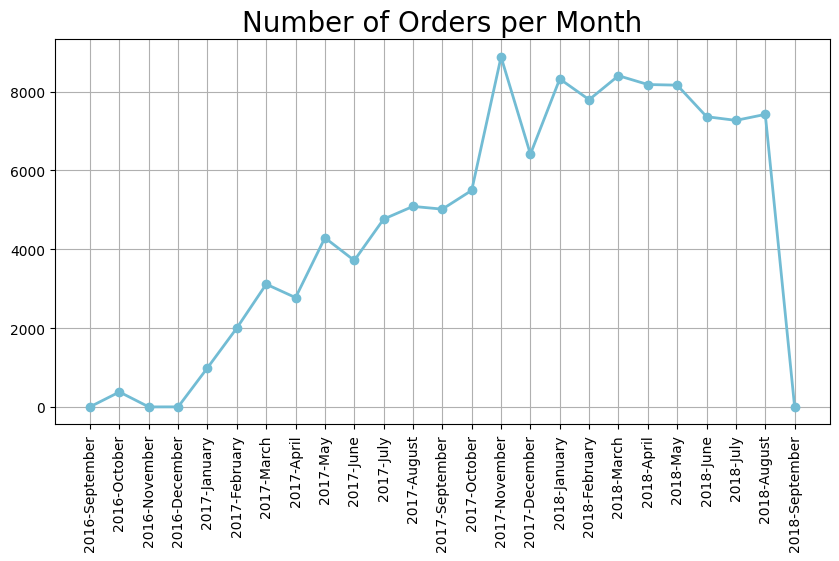

In [354]:
print("\
Order Analysis:")

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

<ipython-input-355-0ccc26e30a14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-355-0ccc26e30a14>:9: UserWarning: The palette list has more values (27) than needed (10), which may not be intended.
  sns.barplot(


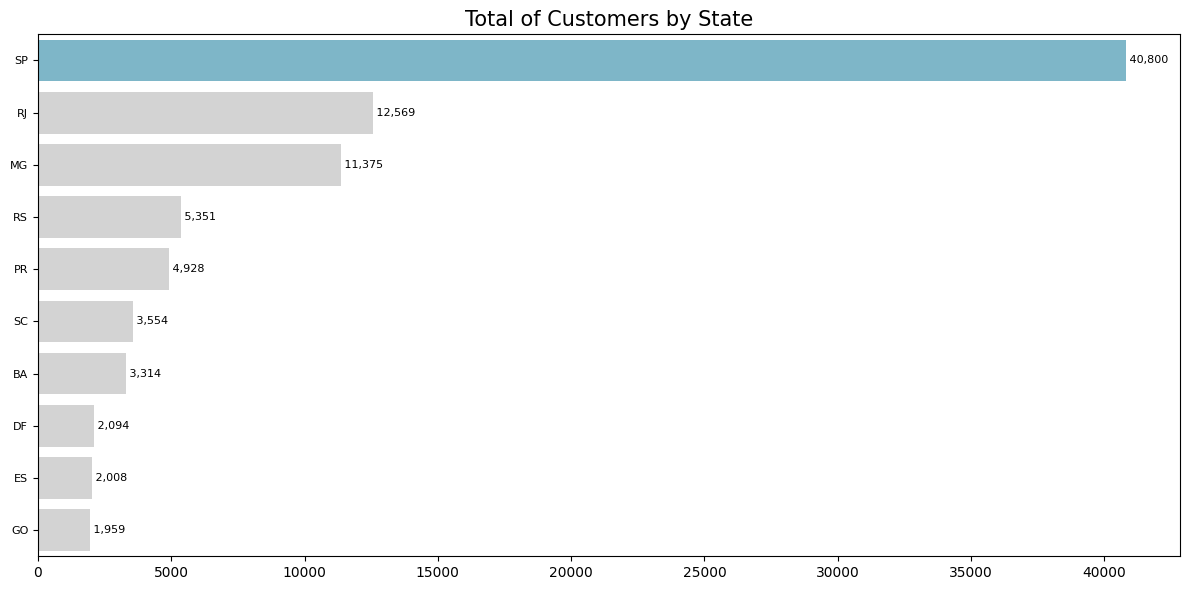

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bystate_df = final_df.groupby('customer_state').agg(customer_count=('customer_id', 'nunique')).reset_index()
plt.figure(figsize=(12, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * 26

sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors
)

plt.title("Total of Customers by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=8)

for i, v in enumerate(bystate_df.sort_values(by="customer_count", ascending=False).head(10)['customer_count']):
    plt.text(v, i, f' {v:,}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

Product Analysis:
Total number of products: 32951
Number of product categories: 73


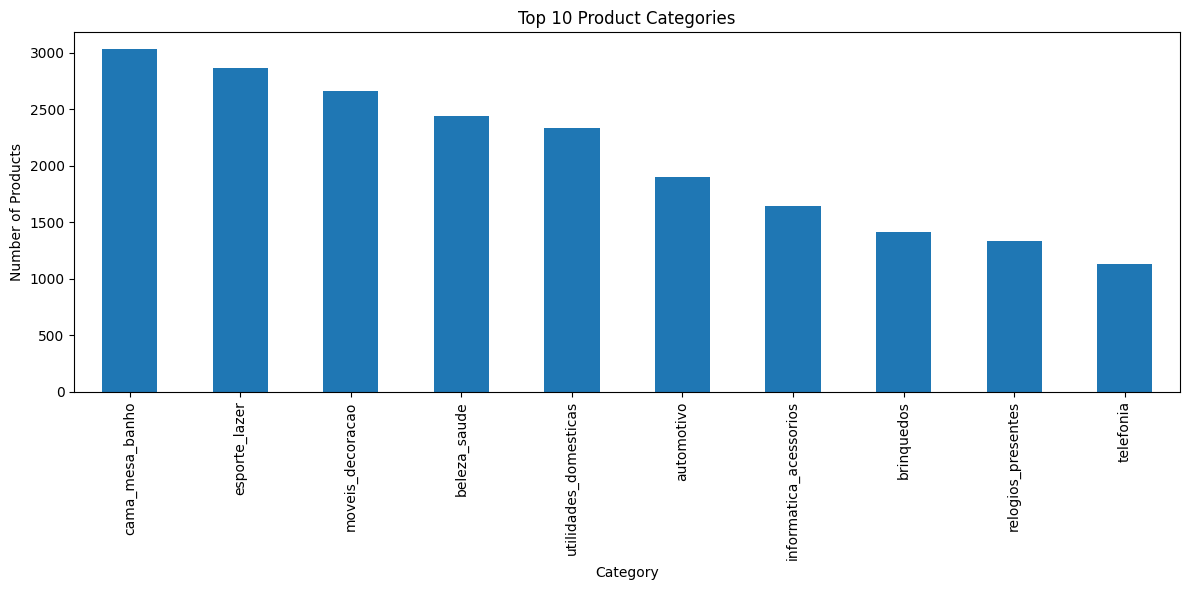

In [356]:
print("\
Product Analysis:")
print(f"Total number of products: {len(products_df)}")
print(f"Number of product categories: {products_df['product_category_name'].nunique()}")

top_categories = products_df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
plt.close()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


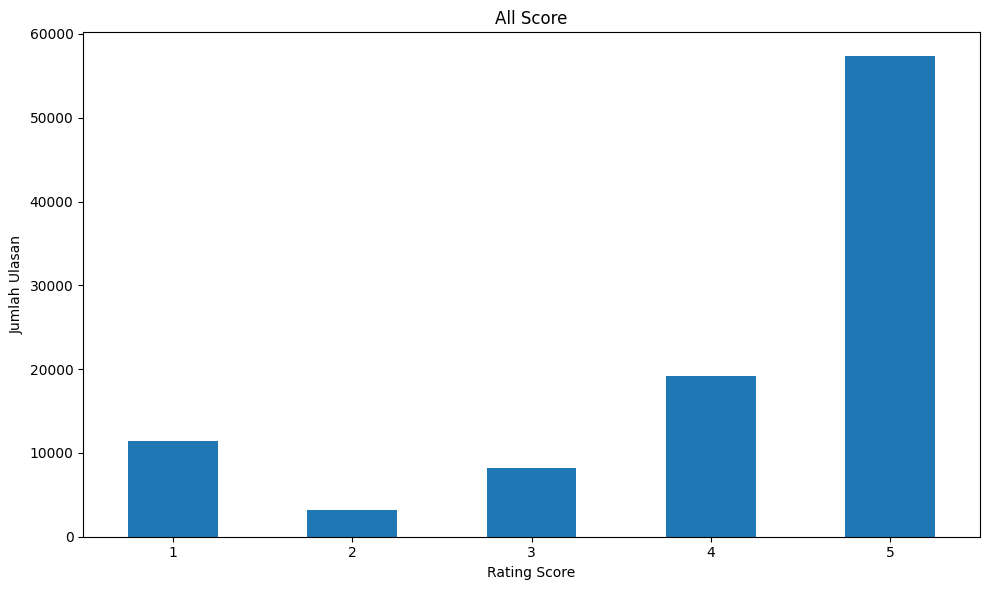

In [357]:
review_scores = order_reviews_df['review_score'].value_counts().sort_index()
print(review_scores)

plt.figure(figsize=(10, 6))
review_scores.plot(kind='bar')
plt.title('All Score')
plt.xlabel('Rating Score')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
plt.close()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


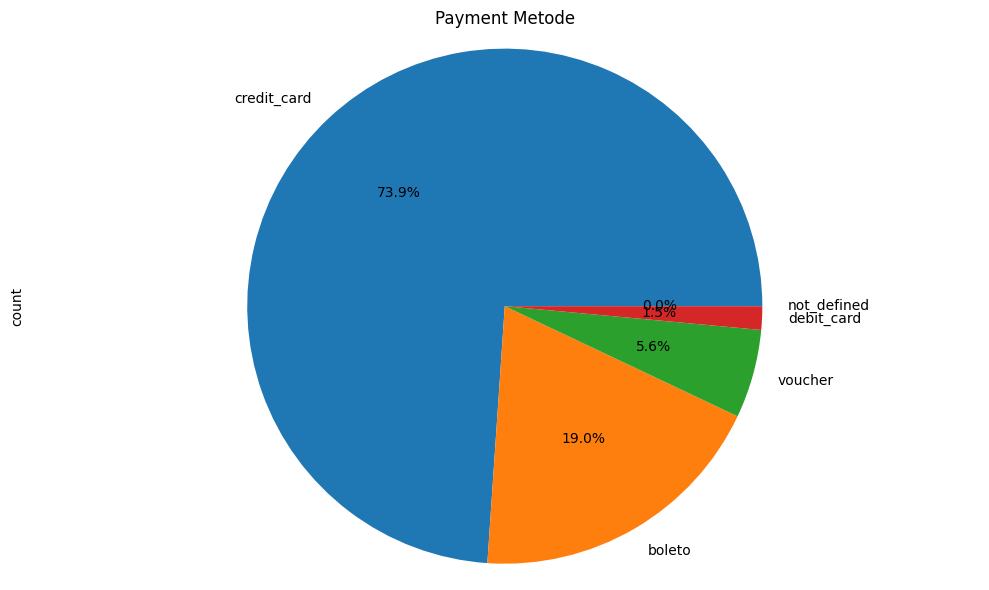

Nilai pembayaran rata-rata: $154.10


In [358]:
payment_types = order_payments_df['payment_type'].value_counts()
print(payment_types)

plt.figure(figsize=(10, 6))
payment_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Metode')
plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

average_payment = order_payments_df['payment_value'].mean()
print(f"\
Nilai pembayaran rata-rata: ${average_payment:.2f}")

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


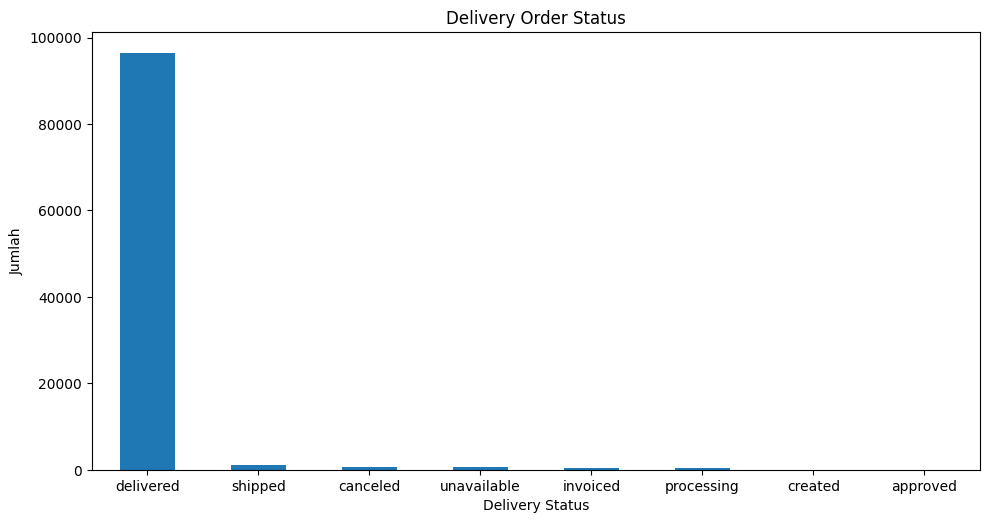

In [359]:
order_status_counts = orders_df['order_status'].value_counts()
print(order_status_counts)

plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar')
plt.title('Delivery Order Status')
plt.xlabel('Delivery Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.xticks(rotation=0)

plt.show()
plt.close()

In [360]:
rfm_df = final_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'price': 'sum'
})
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [361]:
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp']).dt.date
recent_date = rfm_df['max_order_timestamp'].max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,154


In [362]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


In [363]:
rfm_df.describe()

,frequency,monetary,recency
count,97255.0,97255.000000,97255.00000
mean,1.0,144.080143,244.99380
std,0.0,240.990583,153.39027
min,1.0,0.850000,0.00000
25%,1.0,47.490000,121.00000
50%,1.0,89.000000,226.00000
75%,1.0,154.900000,355.00000
max,1.0,13440.000000,729.00000


In [364]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
28666,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.0,0
6283,10a79ef2783cae3d8d678e85fde235ac,1,6.9,5
70466,b8c19e70d00f6927388e4f31c923d785,1,169.8,5
31943,54365416b7ef5599f54a6c7821d5d290,1,99.0,5
75067,c4c66f47534e09a03fc7a878a9eda5ea,1,65.0,5


In [365]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.8,293
64833,aa57e2ac661dae06e72fd085abc4b249,1,39.9,385
64842,aa5ca8afef8fe0f0ef822a9da12d2cf1,1,129.0,206
64841,aa5c0aaed0105f447bd7e6198ae88108,1,103.0,10
64840,aa5b7785199c225fb6938bf1372d6026,1,34.0,262


<ipython-input-366-81551a7b7153>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-366-81551a7b7153>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-366-81551a7b7153>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

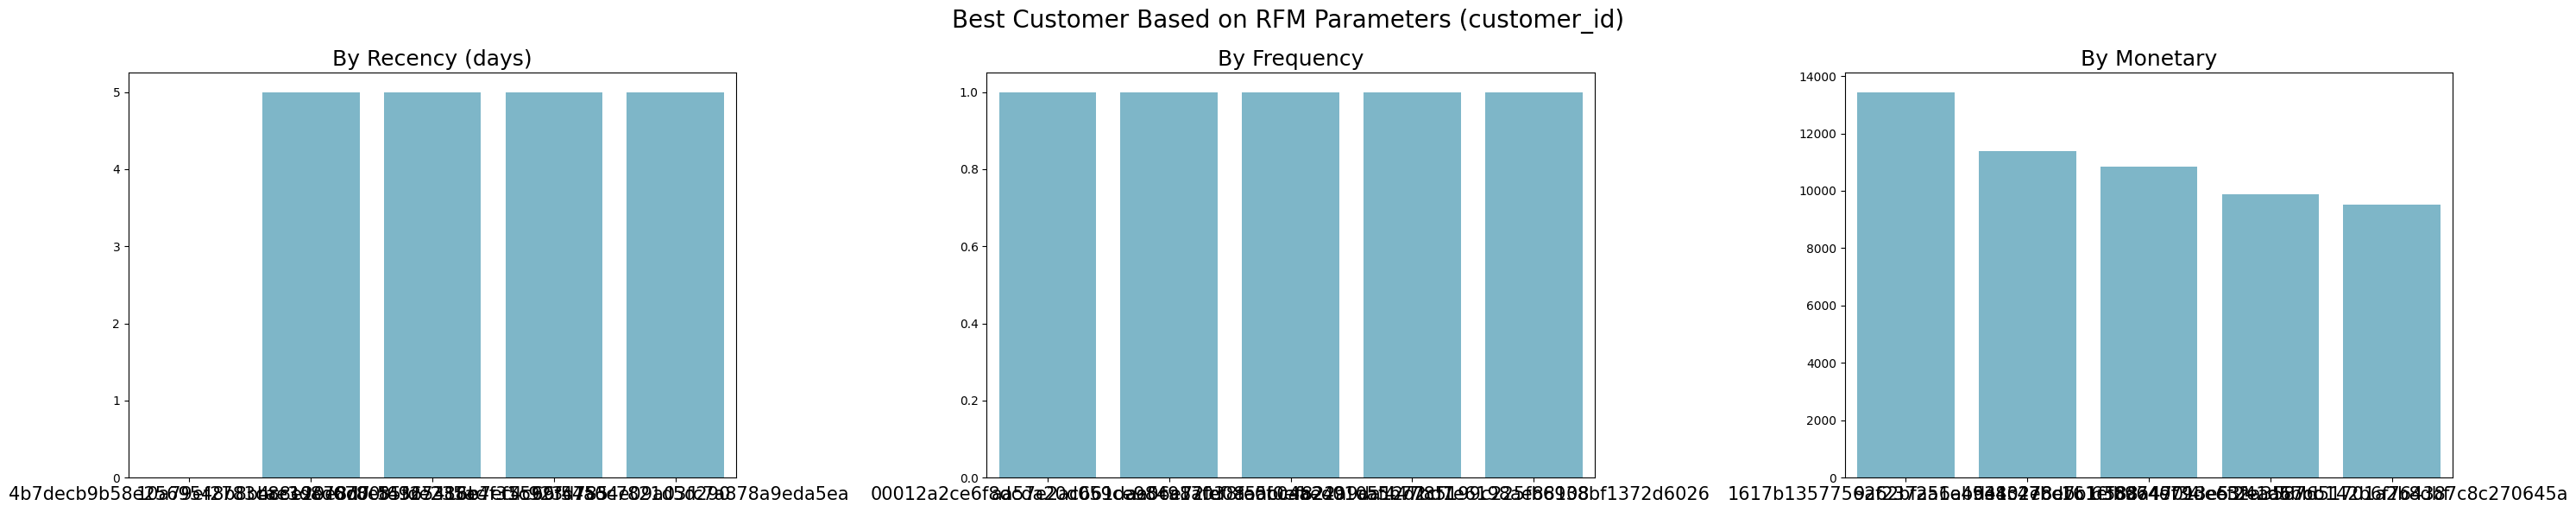

In [366]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()

In [367]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,33353.5,48628.0,48908.0
1,000161a058600d5901f007fab4c27140,1,54.90,414,16294.0,48628.0,30138.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2741.5,48628.0,78057.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383,20505.0,48628.0,71628.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,154,65132.0,48628.0,51307.5


In [368]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,34.294895,100.0,50.288417
1,000161a058600d5901f007fab4c27140,1,54.90,414,16.753894,100.0,30.988638
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2.818878,100.0,80.260141
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383,21.083749,100.0,73.650198
4,000379cdec625522490c315e70c7a9fb,1,93.00,154,66.970336,100.0,52.755642


In [369]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.09
1,000161a058600d5901f007fab4c27140,2.41
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.49
6,000419c5494106c306a97b5635748086,2.31


In [370]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.09,Medium value customer
1,000161a058600d5901f007fab4c27140,2.41,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.49,Low value customers
6,000419c5494106c306a97b5635748086,2.31,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.79,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [371]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15835
1,Low value customers,40789
2,Medium value customer,34154
3,Top customers,5370
4,lost customers,1107


<ipython-input-372-489f0dba2d08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


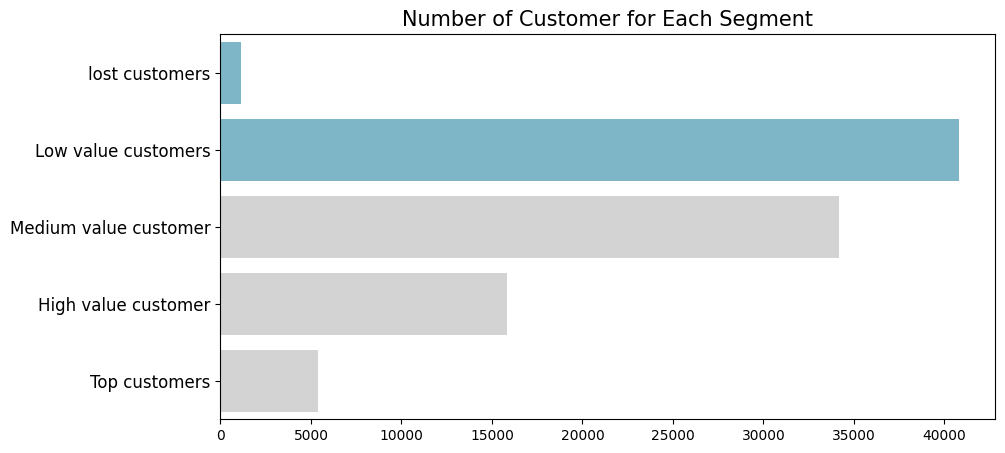

In [372]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 1:
Bagaimana tren penjualan bulanan atau tahunan berdasarkan data order_purchase_timestamp? juga pada bulan dan tahun apa terdapat penjualan tertingginya?

Order Analysis:


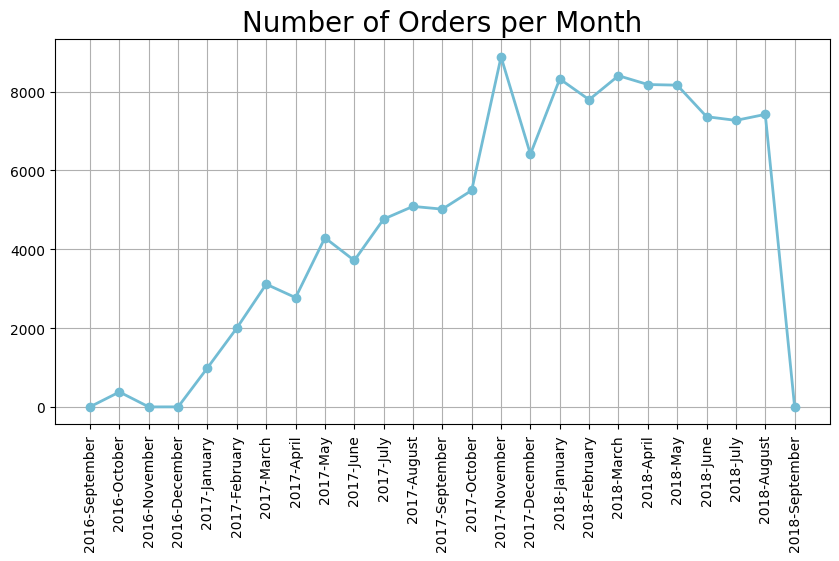

In [373]:
print("\
Order Analysis:")

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Pertanyaan 2:
Kategori Produk apa yang paling sering dibeli oleh konsumen (berdasarkan product_id)? dan bagaimana dengan top 10 produck berdasarkan penjualan terbesar atau terbanyak?

Product Analysis:
Total number of products: 32951
Number of product categories: 73


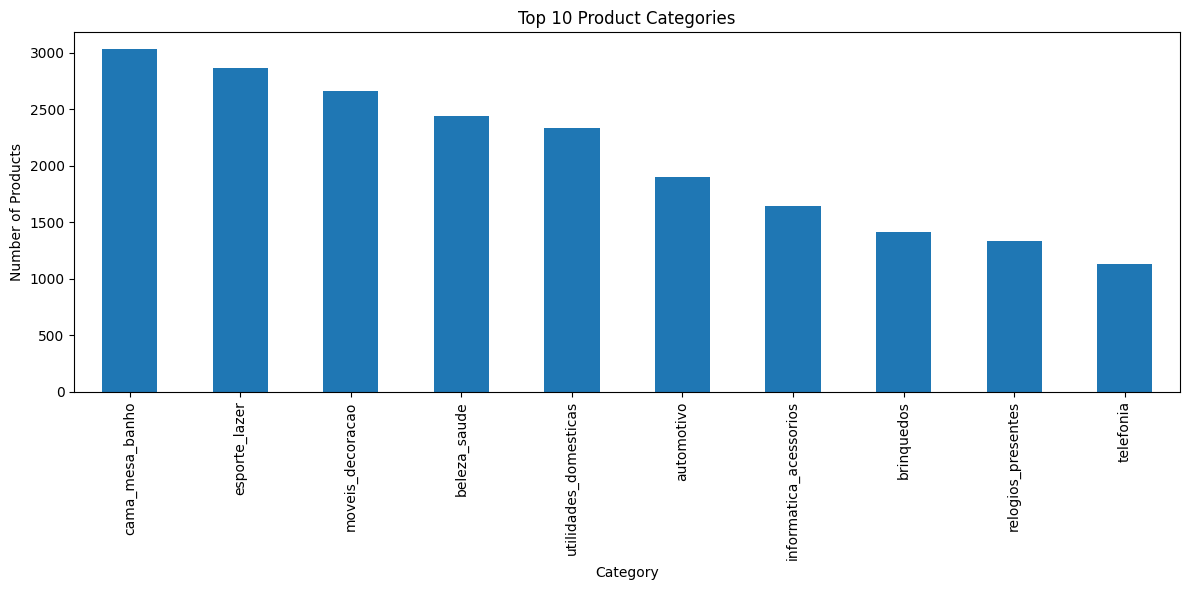

In [374]:
print("\
Product Analysis:")
print(f"Total number of products: {len(products_df)}")
print(f"Number of product categories: {products_df['product_category_name'].nunique()}")

top_categories = products_df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
plt.close()

### Pertanyaan 3:
Bagaimana distribusi skor ulasan di seluruh dataset? dan apakah customer cenderung merasa puas terhadap product yang disajikan atau cenderung sebaliknya?

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


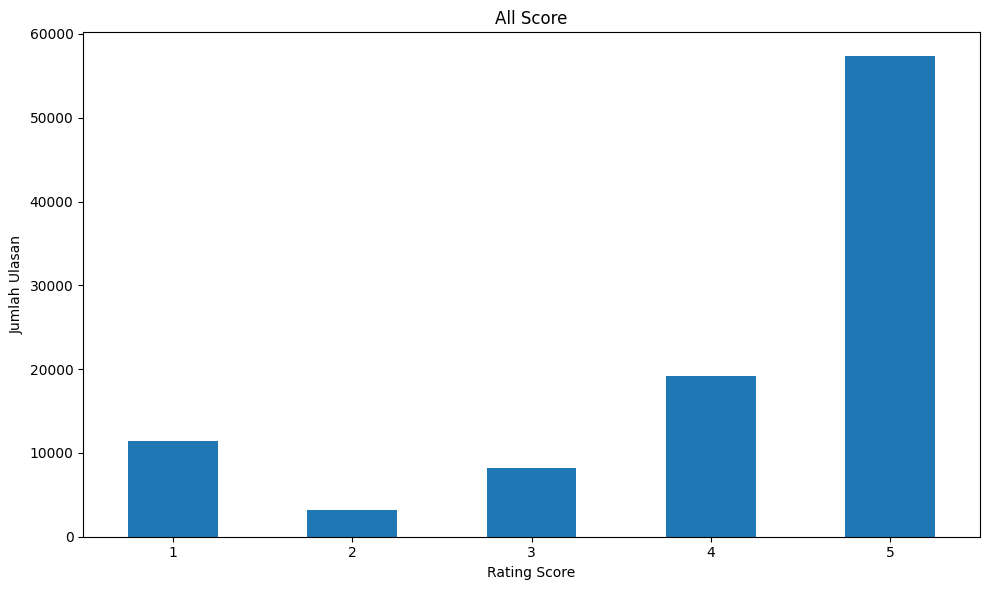

In [375]:
review_scores = order_reviews_df['review_score'].value_counts().sort_index()
print(review_scores)

plt.figure(figsize=(10, 6))
review_scores.plot(kind='bar')
plt.title('All Score')
plt.xlabel('Rating Score')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
plt.close()

### Pertanyaan 4:
Di Negara Bagian manakah konsentrasi penjual terbesar itu terjadi? dan Bagaimana kinerja penjualan di negara bagian lain apabila
dibandingkan dengan negara bagian dengan penjualan terbesar itu?

<ipython-input-376-0ccc26e30a14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-376-0ccc26e30a14>:9: UserWarning: The palette list has more values (27) than needed (10), which may not be intended.
  sns.barplot(


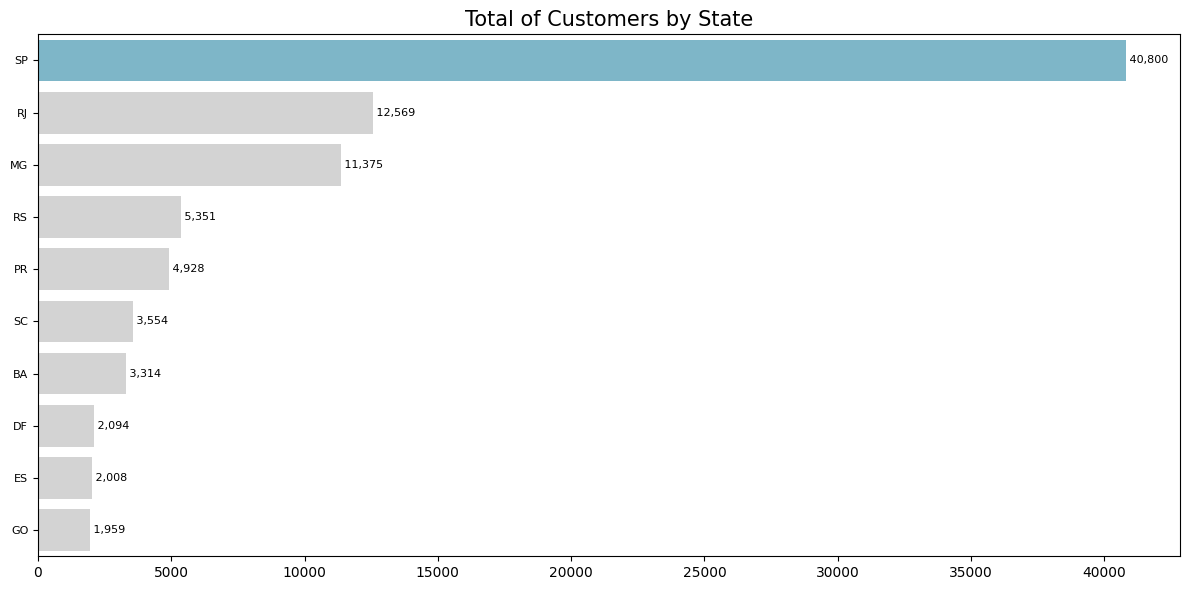

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bystate_df = final_df.groupby('customer_state').agg(customer_count=('customer_id', 'nunique')).reset_index()
plt.figure(figsize=(12, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * 26

sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors
)

plt.title("Total of Customers by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=8)

for i, v in enumerate(bystate_df.sort_values(by="customer_count", ascending=False).head(10)['customer_count']):
    plt.text(v, i, f' {v:,}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

### Pertanyaan 5:
Apa jenis metode pembayaran yang paling umum digunakan oleh konsumen? dan Apakah terdapat perbedaan nilai transaksi rata-rata antara metode pembayaran yang berbeda?

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


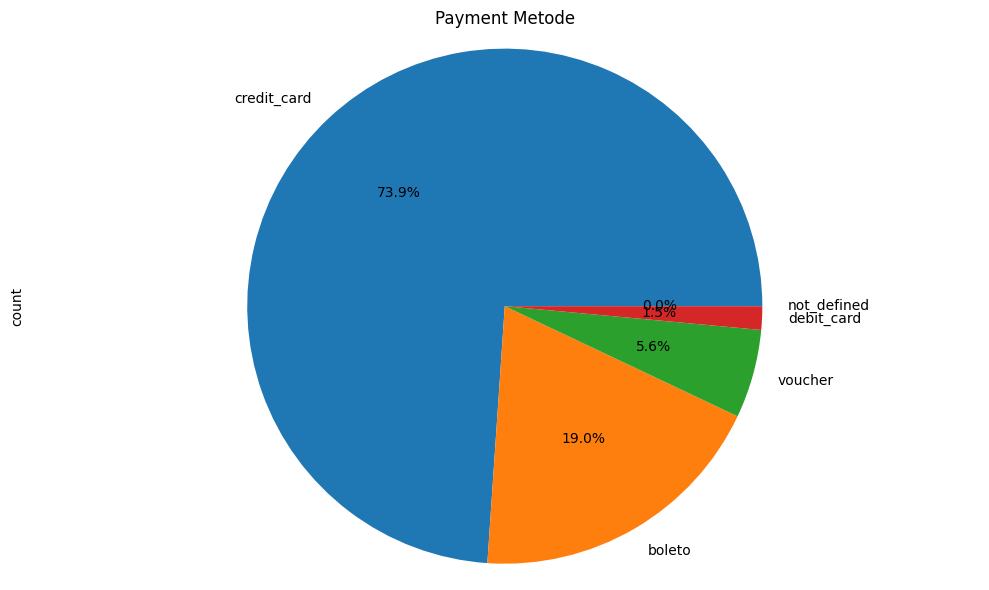

Nilai pembayaran rata-rata: $154.10


In [377]:
payment_types = order_payments_df['payment_type'].value_counts()
print(payment_types)

plt.figure(figsize=(10, 6))
payment_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Metode')
plt.axis('equal')
plt.tight_layout()

plt.show()
plt.close()

average_payment = order_payments_df['payment_value'].mean()
print(f"\
Nilai pembayaran rata-rata: ${average_payment:.2f}")

## Conclusion

- Conclution pertanyaan 1
Bagaimana tren penjualan bulanan atau tahunan berdasarkan data order_purchase_timestamp? juga pada bulan dan tahun apa terdapat penjualan tertingginya?

  Berdasarkan hasil yang diperoleh dari grafik tersebut, ditunjukan trend yang dimulai pada September 2016 cenderung mengalami kenaikan yang signifikan dan berkala dan puncaknya adalah pada November 2017 dimana menunjukan indikasi penjualan tertingginya. setelah itu grafik tersebut menunjukan penyusutan seiring dengan trend produk yang ada

- Conclution pertanyaan 2
Kategori Produk apa yang paling sering dibeli oleh konsumen (berdasarkan product_id)? dan bagaimana dengan top 10 produck berdasarkan penjualan terbesar atau terbanyak?

  Berdasarkan hasil yang diperoleh dari grafik tersebut, dapat ditunjukan bahwa kategori produk yang paling sering dibeli oleh konsumen adalah cama_mesa_banho sementara itu untuk top 10 produknya dapat dilihat lewat visualisasi bar yang ada diatas

- Conclution pertanyaan 3
Bagaimana distribusi skor ulasan di seluruh dataset? dan apakah customer cenderung merasa puas terhadap product yang disajikan atau cenderung sebaliknya?

  Berdasarkan hasil yang diperoleh dari visualisasi data yang ada diatas, dapat disimpulkan bahwa Rata-rata skor ulasan adalah 4.09, menunjukkan tingkat kepuasan yang tinggi di antara pelanggan. Sebagian besar ulasan adalah positif, dengan skor 4 dan 5 mendominasi.

- Conclution pertanyaan 4
 Di Negara Bagian manakah konsentrasi penjual terbesar itu terjadi? dan Bagaimana kinerja penjualan di negara bagian lain apabila dibandingkan dengan negara bagian dengan penjualan terbesar itu?

 Berdasarrkan hasil dari visualisasi data tersebut dapat disimpulkan bahwa Terdapat berbagai penjualan dalam dataset, dengan konsentrasi penjual terbesar berada di negara bagian SP. Ini menunjukkan bahwa SP adalah pusat aktivitas penjualan yang kemudian disusul oleh rj dan mj sebagai yang kedua dan ketiga

- Conclution pertanyaan 5
 Apa jenis metode pembayaran yang paling umum digunakan oleh konsumen? dan Apakah terdapat perbedaan nilai transaksi rata-rata antara metode pembayaran yang berbeda?

 berdasarkan hasil visualisasi yang didapatkan dapat diketahui bahwa Metode Pembayaran dengan kartu kredit adalah yang paling umum, menyumbang sebagian besar transaksi. Nilai pembayaran rata-rata adalah $154.10. dan diikuti oleh booleto dan voucher sebagai yang kedua dan ketiga.

In [378]:
final_df.to_csv("all_data.csv", index=False)